In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import seaborn as sns

taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [19]:
# Filter for rows where house age is 0 to 15 years
taiwan_0_to_15 = taiwan_real_estate[taiwan_real_estate["house_age_years"] == "0 to 15"]

# Filter for rows where house age is 15 to 30 years
taiwan_15_to_30 = taiwan_real_estate[taiwan_real_estate["house_age_years"] == "15 to 30"]

# Filter for rows where house age is 30 to 45 years
taiwan_30_to_45 = taiwan_real_estate[taiwan_real_estate["house_age_years"] == "30 to 45"]

# Model price vs. no. convenience stores using 0 to 15 data
mdl_0_to_15 = ols("price_twd_msq ~ n_convenience", data=taiwan_0_to_15).fit()
mdl_all_ages = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit()

# Model price vs. no. convenience stores using 15 to 30 data
mdl_15_to_30 = ols("price_twd_msq ~ n_convenience", data=taiwan_15_to_30).fit()

# Model price vs. no. convenience stores using 30 to 45 data
mdl_30_to_45 = ols("price_twd_msq ~ n_convenience", data=taiwan_30_to_45).fit()

# Print the coefficients
print(mdl_0_to_15.params)
print(mdl_15_to_30.params)
print(mdl_30_to_45.params)

Intercept        9.241702
n_convenience    0.833587
dtype: float64
Intercept        6.871919
n_convenience    0.851917
dtype: float64
Intercept        8.113123
n_convenience    0.668698
dtype: float64


In [20]:
# Create explanatory_data, setting no. of conv stores from  0 to 10
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Add column of predictions using "0 to 15" model and explanatory data 
prediction_data_0_to_15 = explanatory_data.assign(
    price_twd_msq = mdl_0_to_15.predict(explanatory_data))

# Same again, with "15 to 30"
prediction_data_15_to_30 = explanatory_data.assign(
    price_twd_msq = mdl_15_to_30.predict(explanatory_data))

# Same again, with "30 to 45"
prediction_data_30_to_45 = explanatory_data.assign(
    price_twd_msq = mdl_30_to_45.predict(explanatory_data))

print(prediction_data_0_to_15)
print(prediction_data_15_to_30)
print(prediction_data_30_to_45)
prediction_data_0_to_15['house_age_years'] = '0 to 15'
prediction_data_15_to_30['house_age_years'] = '15 to 30'
prediction_data_30_to_45['house_age_years'] = '30 to 45'
prediction_data = pd.concat([prediction_data_0_to_15, prediction_data_15_to_30, prediction_data_30_to_45])


    n_convenience  price_twd_msq
0               0       9.241702
1               1      10.075289
2               2      10.908876
3               3      11.742462
4               4      12.576049
5               5      13.409636
6               6      14.243222
7               7      15.076809
8               8      15.910396
9               9      16.743982
10             10      17.577569
    n_convenience  price_twd_msq
0               0       6.871919
1               1       7.723836
2               2       8.575753
3               3       9.427670
4               4      10.279588
5               5      11.131505
6               6      11.983422
7               7      12.835339
8               8      13.687257
9               9      14.539174
10             10      15.391091
    n_convenience  price_twd_msq
0               0       8.113123
1               1       8.781822
2               2       9.450520
3               3      10.119218
4               4      10.787916
5         

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


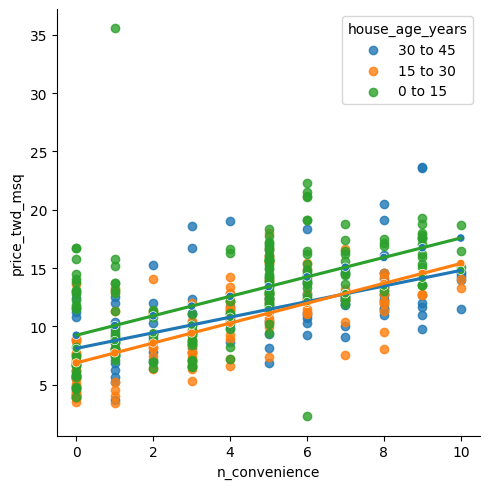

In [21]:
# Plot the trend lines of price_twd_msq vs. n_convenience for each house age category
sns.lmplot(x="n_convenience",
           y="price_twd_msq",
           data=taiwan_real_estate,
           hue="house_age_years",
           ci=None,
           legend_out=False)

# Add a scatter plot for prediction_data
sns.scatterplot(x="n_convenience", y="price_twd_msq", data=prediction_data, hue="house_age_years", legend=False)

plt.show()

In [22]:
# Print the coeff. of determination for mdl_all_ages
print("R-squared for mdl_all_ages: ", mdl_all_ages.rsquared)

# Print the coeff. of determination for mdl_0_to_15
print("R-squared for mdl_0_to_15: ", mdl_0_to_15.rsquared)

# Print the coeff. of determination for mdl_15_to_30
print("R-squared for mdl_15_to_30: ", mdl_15_to_30.rsquared)

# Print the coeff. of determination for mdl_30_to_45
print("R-squared for mdl_30_to_45: ", mdl_30_to_45.rsquared)

R-squared for mdl_all_ages:  0.32604660851305034
R-squared for mdl_0_to_15:  0.3120536339435179
R-squared for mdl_15_to_30:  0.4424604869682426
R-squared for mdl_30_to_45:  0.3125713334387281


In [23]:
# Print the RSE for mdl_all_ages
print("RSE for mdl_all_ages: ", np.sqrt(mdl_all_ages.mse_resid))

# Print the RSE for mdl_0_to_15
print("RSE for mdl_0_to_15: ", np.sqrt(mdl_0_to_15.mse_resid))

# Print the RSE for mdl_15_to_30
print("RSE for mdl_15_to_30: ", np.sqrt(mdl_15_to_30.mse_resid))

# Print the RSE for mdl_30_to_45
print("RSE for mdl_30_to_45: ", np.sqrt(mdl_30_to_45.mse_resid))

RSE for mdl_all_ages:  3.383887521343047
RSE for mdl_0_to_15:  3.5641269936319704
RSE for mdl_15_to_30:  2.5852728709073385
RSE for mdl_30_to_45:  3.239037479434981


In [24]:
# Model price vs both with an interaction using "times" syntax
mdl_price_vs_both_inter = ols("price_twd_msq ~ n_convenience * house_age_years", data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both_inter.params)

Intercept                                    9.241702
house_age_years[T.15 to 30]                 -2.369784
house_age_years[T.30 to 45]                 -1.128579
n_convenience                                0.833587
n_convenience:house_age_years[T.15 to 30]    0.018331
n_convenience:house_age_years[T.30 to 45]   -0.164889
dtype: float64


In [25]:
# Model price vs. both with an interaction using "colon" syntax
mdl_price_vs_both_inter = ols('price_twd_msq ~ n_convenience + house_age_years + n_convenience:house_age_years', data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both_inter.params)

Intercept                                    9.241702
house_age_years[T.15 to 30]                 -2.369784
house_age_years[T.30 to 45]                 -1.128579
n_convenience                                0.833587
n_convenience:house_age_years[T.15 to 30]    0.018331
n_convenience:house_age_years[T.30 to 45]   -0.164889
dtype: float64


In [26]:
# Model price vs. house age plus an interaction, no intercept
mdl_readable_inter = ols("price_twd_msq ~ house_age_years + n_convenience:house_age_years + 0",
                         data=taiwan_real_estate).fit()

# Print the coefficients for mdl_0_to_15
print("mdl_0_to_15 coefficients:", "\n", mdl_0_to_15.params)

# Print the coefficients for mdl_15_to_30
print("mdl_15_to_30 coefficients:", "\n", mdl_15_to_30.params)

# Print the coefficients for mdl_30_to_45
print("mdl_30_to_45 coefficients:", "\n", mdl_30_to_45.params)

# Print the coefficients for mdl_readable_inter
print("\n", "mdl_readable_inter coefficients:", "\n", mdl_readable_inter.params)

mdl_0_to_15 coefficients: 
 Intercept        9.241702
n_convenience    0.833587
dtype: float64
mdl_15_to_30 coefficients: 
 Intercept        6.871919
n_convenience    0.851917
dtype: float64
mdl_30_to_45 coefficients: 
 Intercept        8.113123
n_convenience    0.668698
dtype: float64

 mdl_readable_inter coefficients: 
 house_age_years[0 to 15]                   9.241702
house_age_years[15 to 30]                  6.871919
house_age_years[30 to 45]                  8.113123
n_convenience:house_age_years[0 to 15]     0.833587
n_convenience:house_age_years[15 to 30]    0.851917
n_convenience:house_age_years[30 to 45]    0.668698
dtype: float64


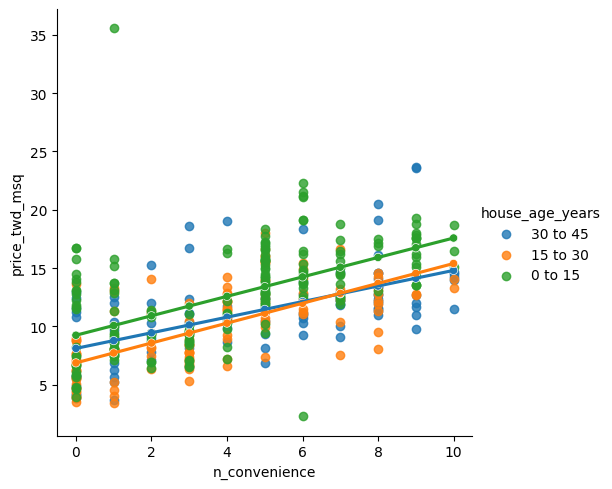

In [33]:
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "house_age_years"])

# Add predictions to the DataFrame
prediction_data = explanatory_data.assign( 
      price_twd_msq = mdl_price_vs_both_inter.predict(explanatory_data))

# Plot the trend lines of price_twd_msq vs. n_convenience colored by house_age_years
sns.lmplot(x="n_convenience",
           y="price_twd_msq",
           data=taiwan_real_estate,
           hue="house_age_years",
           ci=None)

# Add a scatter plot for prediction_data
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=prediction_data, 
                hue="house_age_years",
                legend=False)

# Show the plot
plt.show()

In [36]:
# Get the coefficients from mdl_price_vs_both_inter
coeffs = mdl_price_vs_both_inter.params

# Assign each of the elements of coeffs
ic_0_15, ic_15_30, ic_30_45, slope_0_15, slope_15_30, slope_30_45 = coeffs

# Create conditions
conditions = [
    explanatory_data["house_age_years"] == "0 to 15",
    explanatory_data["house_age_years"] == "15 to 30",
    explanatory_data["house_age_years"] == "30 to 45"
]

# Create intercept_choices
intercept_choices = [ic_0_15, ic_15_30, ic_30_45]

# Create slope_choices
slope_choices = [slope_0_15, slope_15_30, slope_30_45]

# Create intercept and slope
intercept = np.select(conditions, intercept_choices)
slope = np.select(conditions, slope_choices)

# Create prediction_data with columns intercept and price_twd_msq
prediction_data = explanatory_data.assign(
  price_twd_msq = intercept + slope * explanatory_data["n_convenience"])

# Print it
print(prediction_data)

    n_convenience house_age_years  price_twd_msq
0               0        30 to 45      -1.128579
1               0        15 to 30      -2.369784
2               0         0 to 15       9.241702
3               1        30 to 45      -1.293467
4               1        15 to 30      -2.351453
5               1         0 to 15      10.075289
6               2        30 to 45      -1.458356
7               2        15 to 30      -2.333122
8               2         0 to 15      10.908876
9               3        30 to 45      -1.623244
10              3        15 to 30      -2.314792
11              3         0 to 15      11.742462
12              4        30 to 45      -1.788133
13              4        15 to 30      -2.296461
14              4         0 to 15      12.576049
15              5        30 to 45      -1.953021
16              5        15 to 30      -2.278131
17              5         0 to 15      13.409636
18              6        30 to 45      -2.117910
19              6   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         343 non-null    float64
 1   openbid       343 non-null    float64
 2   auction_type  343 non-null    object 
dtypes: float64(2), object(1)
memory usage: 8.2+ KB
None
Intercept    229.245667
openbid       -0.002098
dtype: float64


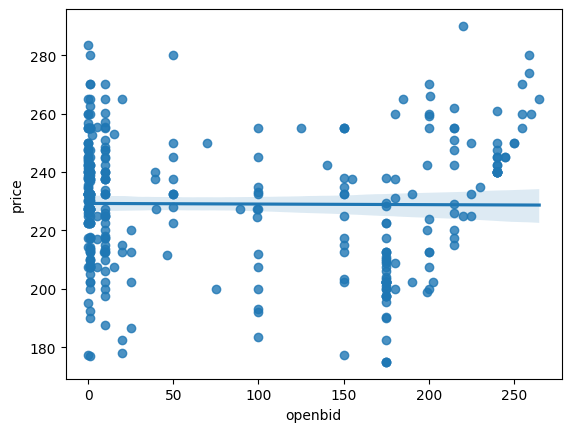

In [40]:
# Take a glimpse at the dataset
print(auctions.info())

# Model price vs. opening bid using auctions
mdl_price_vs_openbid = ols("price ~ openbid", data = auctions).fit()

# See the result
print(mdl_price_vs_openbid.params)

# Plot the scatter plot pf price vs. openbid with a linear trend line
sns.regplot(x="openbid", y="price", data=auctions)

# Show the plot
plt.show()

In [41]:
# Fit linear regression of price vs. opening bid and auction type, with an interaction, without intercept
from statsmodels.formula.api import ols

mdl_price_vs_both = ols('price ~ openbid + auction_type + openbid:auction_type - 1', data=auctions).fit()

# See the result
print(mdl_price_vs_both.params)

auction_type[3 day auction]              226.369005
auction_type[5 day auction]              221.599320
auction_type[7 day auction]              231.602861
openbid                                   -0.029026
openbid:auction_type[T.5 day auction]      0.113040
openbid:auction_type[T.7 day auction]      0.032707
dtype: float64


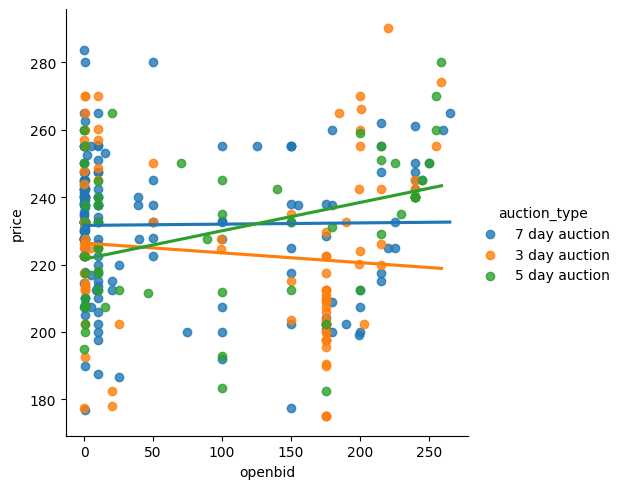

In [42]:
# Fit linear regression of price vs. opening bid and auction type, with an interaction, without intercept
mdl_price_vs_both = ols("price ~ auction_type + openbid:auction_type + 0", data=auctions).fit()

# Using auctions, plot price vs. opening bid colored by auction type as a scatter plot with linear regr'n trend lines
sns.lmplot(x="openbid", y="price", hue="auction_type", data=auctions, ci=None)

# Show the plot
plt.show()